In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/Users/jitikagupta/Downloads/Zomato Dataset.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
Restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
Delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken (min),45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

<Axes: >

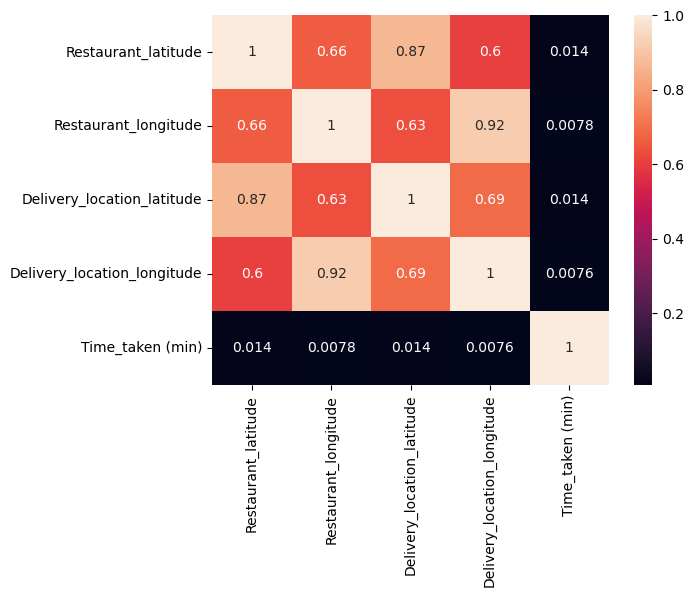

In [6]:
columns_to_correlate = ['Restaurant_latitude', 'Restaurant_longitude',
                        'Delivery_location_latitude', 'Delivery_location_longitude', 
                        'Time_taken (min)']

# subset dataframe with only these columns
df_subset = df[columns_to_correlate]

# correlation matrix and plot the heatmap
sns.heatmap(df_subset.corr(), annot=True)

<Axes: xlabel='Type_of_vehicle', ylabel='Delivery_person_Age'>

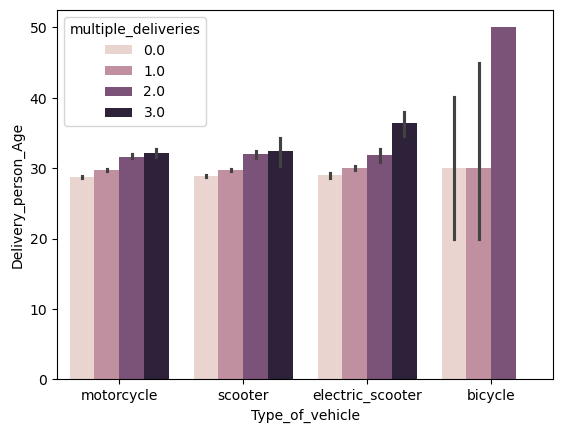

In [7]:
sns.barplot(df,x='Type_of_vehicle',y='Delivery_person_Age',hue='multiple_deliveries')

In [8]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [9]:
df['Delivery_person_Age'] = df.groupby('multiple_deliveries')['Delivery_person_Age']\
                              .transform(lambda x: x.fillna(x.median()))

In [10]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             993
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

<Axes: xlabel='multiple_deliveries', ylabel='Delivery_person_Age'>

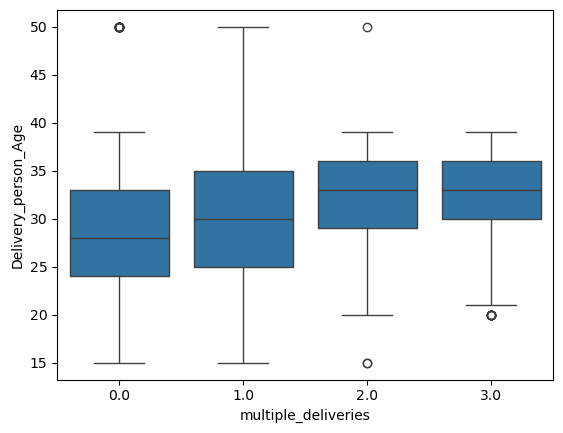

In [11]:
sns.boxplot(df,x='multiple_deliveries',y='Delivery_person_Age')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
columns_to_encode = ['Weather_conditions' ,'Road_traffic_density','Type_of_vehicle','Festival','City','Type_of_order']
label_encoders = {} # To store individual encoders for inspection
    
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # Store the fitted encoder
    

In [17]:
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
4820,0x26fb,MUMRES12DEL02,38.0,4.7,19.207222,72.972281,19.287222,73.052281,02-03-2022,23:10,23:20,5,2,2,3,3,1.0,0,0,26
9381,0xadd0,HYDRES09DEL01,35.0,4.7,17.431668,78.408321,17.441668,78.418321,01-04-2022,08:50,09:05,2,2,2,1,1,1.0,0,0,27
6299,0x590f,RANCHIRES15DEL02,36.0,4.2,23.369746,85.339820,23.449746,85.419820,18-03-2022,22:20,22:25,1,2,0,2,2,1.0,0,3,39
6819,0xa180,PUNERES19DEL01,36.0,4.6,18.563934,73.915367,18.673935,74.025367,02-03-2022,17:55,18:05,4,3,1,3,2,1.0,0,3,18
7081,0xb07c,INDORES11DEL01,32.0,4.9,22.751234,75.889490,22.861234,75.999490,16-03-2022,22:10,22:25,1,2,2,3,2,0.0,0,0,25


In [20]:
print("\nAssigned values for each column:")
for col, le in label_encoders.items():
    print(f"\nColumn: '{col}'")
    for i, category in enumerate(le.classes_):
        print(f"  '{category}' -> {i}")



Assigned values for each column:

Column: 'Weather_conditions'
  'Cloudy' -> 0
  'Fog' -> 1
  'Sandstorms' -> 2
  'Stormy' -> 3
  'Sunny' -> 4
  'Windy' -> 5
  'nan' -> 6

Column: 'Road_traffic_density'
  'High' -> 0
  'Jam' -> 1
  'Low' -> 2
  'Medium' -> 3
  'nan' -> 4

Column: 'Type_of_vehicle'
  'bicycle' -> 0
  'electric_scooter' -> 1
  'motorcycle' -> 2
  'scooter' -> 3

Column: 'Festival'
  'No' -> 0
  'Yes' -> 1
  'nan' -> 2

Column: 'City'
  'Metropolitian' -> 0
  'Semi-Urban' -> 1
  'Urban' -> 2
  'nan' -> 3

Column: 'Type_of_order'
  'Buffet' -> 0
  'Drinks' -> 1
  'Meal' -> 2
  'Snack' -> 3


Text(0.5, 1.0, 'Distribution of City Types')

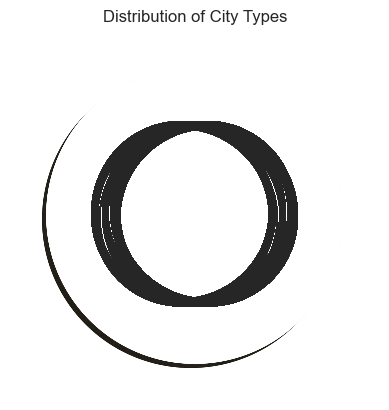

In [19]:
# pie chart using Matplotlib
plt.pie(df.City,autopct='%1.1f%%', shadow=True, startangle=90)

# Add a title
plt.title('Distribution of City Types')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          44591 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           45584 non-null  int64  
 12  Road_traffic_density         45584 non-null  int64  
 13  Vehicle_conditio

In [23]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             993
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

/var/folders/yr/n517prdx12q7p8nqqmr0hjch0000gn/T/ipykernel_29776/484280342.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Delivery_person_Ratings',palette=['green'])


<Axes: xlabel='Delivery_person_Ratings', ylabel='Count'>

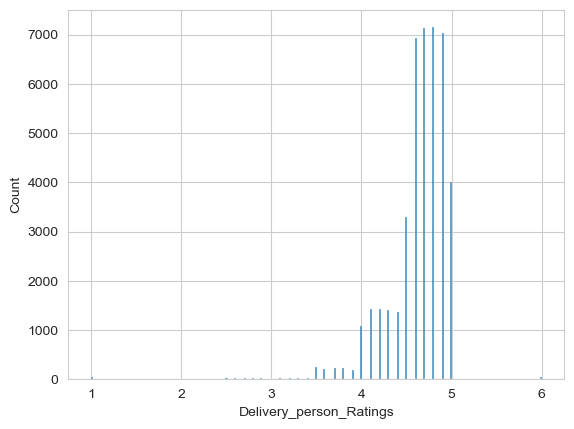

In [24]:
sns.histplot(data=df, x='Delivery_person_Ratings',palette=['green'])

In [25]:
df['Delivery_person_Ratings'] = df.groupby('Delivery_person_Age')['Delivery_person_Ratings']\
                              .transform(lambda x: x.fillna(x.median()))

In [26]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             993
Delivery_person_Ratings         993
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

In [27]:
df.shape

(45584, 20)

In [28]:
df.dropna(subset=['Delivery_person_Ratings'], inplace=True)

In [29]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1681
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

In [30]:
df.shape

(44591, 20)

In [31]:
counts = df['City'].value_counts()
labels = counts.index
sizes = counts.values

In [32]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Day'] = df['Order_Date'].dt.day
df['Month'] = df['Order_Date'].dt.month
df['Year'] = df['Order_Date'].dt.year

In [33]:
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
21539,0x75d4,MUMRES18DEL03,39.0,4.8,19.109300,72.825451,19.139300,72.855451,2022-05-03,23:50,...,1,3,2,1.0,0,0,23,3.0,5.0,2022.0
1019,0x7c8c,RANCHIRES06DEL01,25.0,4.6,23.357804,85.325146,23.397804,85.365146,2022-03-04,16:10,...,1,2,3,1.0,0,0,17,4.0,3.0,2022.0
39951,0x431a,MUMRES07DEL02,25.0,4.8,19.091458,72.827808,19.141458,72.877808,2022-07-03,0.75,...,1,1,3,1.0,0,0,24,3.0,7.0,2022.0
15093,0xd07e,KOLRES05DEL01,36.0,4.4,22.527893,88.368628,22.597893,88.438628,NaT,22:45,...,0,2,2,0.0,0,0,42,NaN,NaN,NaN
2067,0x34e2,HYDRES16DEL02,37.0,4.8,17.440827,78.393391,17.520827,78.473391,NaT,0.833333333,...,1,0,2,1.0,0,0,30,NaN,NaN,NaN


In [34]:
sns.lineplot(x='Month', y='Quantity', hue='OrderType', data=df, sort=False)

ValueError: Could not interpret value `Quantity` for `y`. An entry with this name does not appear in `data`.